<a href="https://colab.research.google.com/github/talaabusoud/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Tala AbuSoud




## Project Overview
### Project 1 - Parts 1 & 2

### Part 1:

This is an overview of the steps you will need to complete for part one of the project. There are more detailed instructions for each section following the overview.

1) Create a GitHub Account

2) Set up a GitHub repository that will house your first portfolio project.

3) Add Markdown cells with your name and section headers to the notebook.

4) Add the Google Colab Notebook to your GitHub repository.

5) Submit the link to your GitHub repo!

### Part 2:

We will continue to work off of the GitHub repository we created last week for your first portfolio project. The goal of your portfolio projects are to have items to show potential employers that demonstrate your data science skills and competencies.

For Part 2, your task is to use Pandas to load in the data and start exploring and cleaning it.  As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

- Download the data using this link in the learn platform.
- Insert code below the heading "Loading Data"
  - Use Pandas to read the sales prediction data set into Google Colab.
  - Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
- Insert code below the heading "Data Cleaning"
  - Explore the data - what do you need to do to clean this data? Clean it!
  - Be sure to address each of the following tasks:

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

* Link to the original dataset on Kaggle

  https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

### Data Dictionary

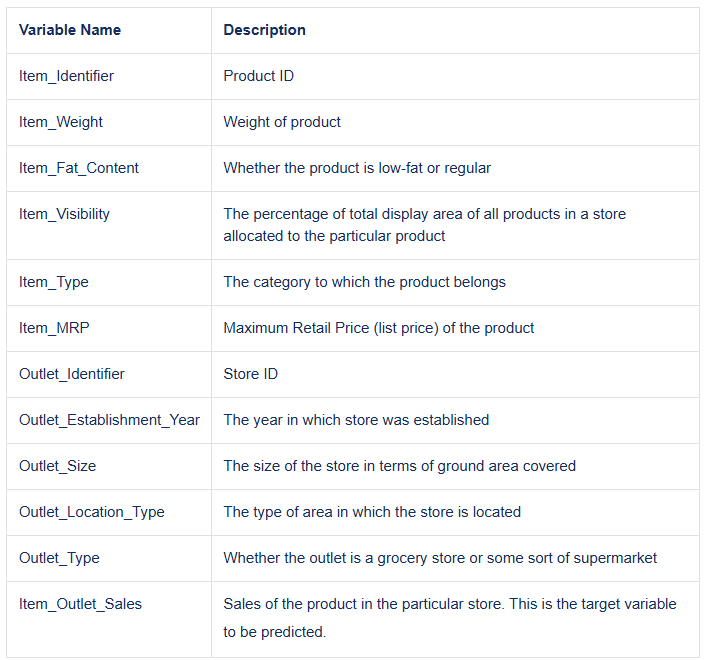

## Load and Inspect Data

### imports:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
df = pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

1) How many rows and columns?

In [8]:
df.shape

(8523, 12)

2) What are the datatypes of each variable?

In [9]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


3) Are there duplicates? If so, drop any duplicates.

In [10]:
df.duplicated().sum()

np.int64(0)

there is no duplicates

4) Identify missing values.

In [11]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [16]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [17]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

5) Address the missing values by using a placeholder value.

In [18]:
# fill Item_Weight with mean
# df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
# # fill Outlet_Size with mode (most frequent category)
# df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

# Fill nulls in Item_Weight with the mean value of the corresponding Item_Type
df['Item_Weight'] = df.groupby('Item_Type')['Item_Weight'].transform(
    lambda x: x.fillna(x.mean())
)

In [19]:
# Function to fill nulls with mode per group
def fill_outlet_size(group):
    mode = group.mode()
    if not mode.empty:
        return group.fillna(mode[0])
    else:
        return group

# Apply mode imputation grouped by Outlet_Type
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(fill_outlet_size)

6) Confirm that there are no missing values after addressing them.

In [20]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [21]:
df.select_dtypes(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Small,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [22]:
for col in df.select_dtypes(include='object').columns:
  print(f'{col}\n', df[col].unique(), '\n')

Item_Identifier
 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] 

Item_Fat_Content
 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] 

Item_Type
 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 

Outlet_Identifier
 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'] 

Outlet_Size
 ['Medium' 'Small' 'High'] 

Outlet_Location_Type
 ['Tier 1' 'Tier 3' 'Tier 2'] 

Outlet_Type
 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 



In [23]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

In [24]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [25]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
numerical_cols.agg(['min', 'max', 'mean'])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.55500,0.000000,31.290000,1985.000000,33.290000
max,21.35000,0.328391,266.888400,2009.000000,13086.964800
mean,12.85789,0.066132,140.992782,1997.831867,2181.288914


## Exploratory Data Analysis

## Feature Inspection
